In [1]:
import keras
import tensorflow as tf

2024-09-11 16:48:36.535748: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-11 16:48:36.549138: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-11 16:48:36.553196: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-11 16:48:36.562865: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-11 16:48:37.424440: W tensorflow/compiler/tf2

In [2]:
from segmentandoDatasets import *

segmentando_datasets(1000,1000,1000)

DataFrame do local PUC salvo como: Datasets_csv/df_PUC.csv
DataFrame do local PUC:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
1  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty
2  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
3  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...  Occupied
4  /home/lucas/Downloads/PKLot/PKLotSegmented/PUC...     Empty


DataFrame do local UFPR04 salvo como: Datasets_csv/df_UFPR04.csv
DataFrame do local UFPR04:
                                      caminho_imagem    classe
0  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
1  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
2  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...  Occupied
3  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty
4  /home/lucas/Downloads/PKLot/PKLotSegmented/UFP...     Empty


DataFrame do local UFPR05 salvo como: Datasets_csv/df_UFPR05.csv


In [3]:
from preprocessamento import *

csv_file = 'Datasets_csv/df_PUC.csv'
_,_,_, x_treino, y_treino, x_teste, y_teste, x_val, y_val = preprocessamento(csv_file)

Found 600 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [4]:
print(f"X Train:",x_treino.shape)
print(f"y Train:",y_treino.shape)

X Train: (600, 256, 256, 3)
y Train: (600,)


In [5]:
from keras.layers import Input, Flatten, Dense, Reshape
from keras.models import Sequential

encoder = keras.models.Sequential([
    keras.layers.Reshape([256,256,3], input_shape=[256,256,3]),
    keras.layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(128, kernel_size=(3, 3), padding="same", activation="relu"),
    keras.layers.MaxPool2D(pool_size=2),  
])

/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1726084127.510914   42855 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726084127.546119   42855 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1726084127.546274   42855 cuda_executor.cc:1015] successful NUMA node rea

In [6]:
decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(128, kernel_size=(3, 3), strides=2, padding="same", activation="relu", input_shape=[16, 16, 128]),
    keras.layers.Conv2DTranspose(64, kernel_size=(3, 3), strides=2, padding="same", activation="relu"),
    keras.layers.Conv2DTranspose(32, kernel_size=(3, 3), strides=2, padding="same", activation="relu"),
    keras.layers.Conv2DTranspose(16, kernel_size=(3, 3), strides=2, padding="same", activation="relu"),
    keras.layers.Conv2DTranspose(3, kernel_size=(3, 3), padding="same", activation="sigmoid"),
])

/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss="binary_crossentropy", optimizer='adam')

In [8]:
history = autoencoder.fit(x_teste,x_teste, epochs=10, batch_size=8, validation_data=(x_val,x_val))

Epoch 1/10


I0000 00:00:1726084131.105241   42951 service.cc:146] XLA service 0x753598045b90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726084131.105263   42951 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce GTX 1660, Compute Capability 7.5
2024-09-11 16:48:51.215282: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-09-11 16:48:51.464088: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
E0000 00:00:1726084132.723228   42951 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1726084132.860472   42951 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


 7/25 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.6927

I0000 00:00:1726084136.967250   42951 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 98ms/step - loss: 0.6886 - val_loss: 0.6755
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.6606 - val_loss: 0.6305
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.6279 - val_loss: 0.6171
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.6117 - val_loss: 0.6137
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.6180 - val_loss: 0.6111
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.6185 - val_loss: 0.6153
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.6060 - val_loss: 0.6055
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.5999 - val_loss: 0.5959
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.6025 - val_loss: 0.5850
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.5813 - val_loss: 0.5857


<Axes: >

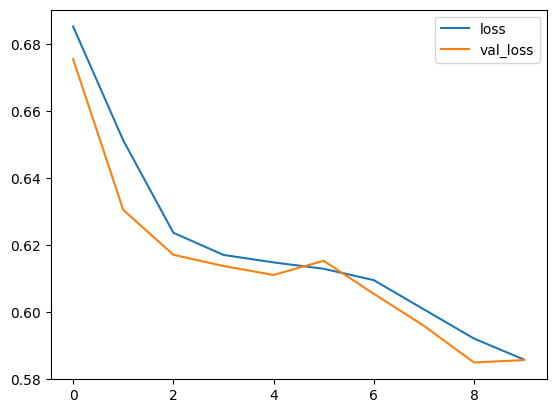

In [9]:
pd.DataFrame(history.history).plot()

In [10]:
autoencoder.save("Modelos_keras/Autoencoder.keras")
autoencoder.save_weights("weights_finais/Autoencoder.weights.h5")

In [11]:
autoencoder.load_weights("weights_finais/Autoencoder.weights.h5")

In [12]:
# Verificar forma antes e depois da previsão
print(f'Forma de x_test: {x_teste.shape}')
imagens_codificadas = encoder.predict(x_teste)
print(f'Forma de encoded_imgs: {imagens_codificadas.shape}')

imagens_decodificadas = decoder.predict(imagens_codificadas)

Forma de x_test: (200, 256, 256, 3)
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Forma de encoded_imgs: (200, 16, 16, 128)


E0000 00:00:1726084151.415784   42947 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1726084151.567907   42947 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1726084152.585712   42947 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1726084152.836253   42947 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1726084153.092204   42947 gpu_timer.cc:183] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
2024-

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step


In [13]:
import matplotlib.pyplot as plt
import numpy as np

def plot_autoencoder(x_test, Autoencoder):
    def normalize(image):
        image = np.clip(image, 0, 1)  # Garante que a imagem esteja no intervalo [0, 1]
        return (image - image.min()) / (image.max() - image.min()) if image.max() != image.min() else image

    plt.figure(figsize=(16, 8))

    for i in range(8):
        # Imagem original
        plt.subplot(2, 8, i + 1)
        plt.imshow(x_test[i])
        plt.title("Original")
        plt.axis("off")

        # Predição e normalização
        pred = Autoencoder.predict(x_test[i].reshape((1, 256, 256, 3)))
        pred_img = normalize(pred[0])

        plt.subplot(2, 8, i + 8 + 1)
        plt.imshow(pred_img)
        plt.title("Reconstruída")
        plt.axis("off")

    plt.show()


In [14]:
"""_, _, _, x_train_UFPR04, y_train, x_test, y_test, x_val, y_val = preprocessamento("Datasets_csv/df_UFPR04.csv", 0.6, 0.2, 0.2)
_, _, _, x_train_UFPR05, y_train, x_test, y_test, x_val, y_val = preprocessamento("Datasets_csv/df_UFPR05.csv", 0.6, 0.2, 0.2)"""

'_, _, _, x_train_UFPR04, y_train, x_test, y_test, x_val, y_val = preprocessamento("Datasets_csv/df_UFPR04.csv", 0.6, 0.2, 0.2)\n_, _, _, x_train_UFPR05, y_train, x_test, y_test, x_val, y_val = preprocessamento("Datasets_csv/df_UFPR05.csv", 0.6, 0.2, 0.2)'

In [15]:
"""plot_autoencoder(x_teste, autoencoder)
plot_autoencoder(x_train_UFPR04, autoencoder)
plot_autoencoder(x_train_UFPR05, autoencoder)"""

'plot_autoencoder(x_teste, autoencoder)\nplot_autoencoder(x_train_UFPR04, autoencoder)\nplot_autoencoder(x_train_UFPR05, autoencoder)'

In [16]:
shape_imagem_codificada = imagens_codificadas.reshape((imagens_codificadas.shape[0], -1))

print(shape_imagem_codificada.shape)

classificador = Sequential([
    Dense(128, activation='relu', input_shape=(shape_imagem_codificada.shape[1],)),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax') 
])

classificador.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

classificador.fit(shape_imagem_codificada, y_teste, epochs=10, batch_size=8, validation_split=0.1)
teste_loss, teste_accuracy = classificador.evaluate(shape_imagem_codificada, y_teste)
print(f'Teste loss: {teste_loss}, Teste accuracy: {teste_accuracy}')


(200, 32768)
Epoch 1/10


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.6876 - loss: 1.1762 - val_accuracy: 0.9000 - val_loss: 0.9080
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9369 - loss: 0.2235 - val_accuracy: 0.9000 - val_loss: 0.4438
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9544 - loss: 0.1265 - val_accuracy: 0.9000 - val_loss: 0.2495
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9461 - loss: 0.1785 - val_accuracy: 0.9000 - val_loss: 0.2256
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9705 - loss: 0.0690 - val_accuracy: 0.9000 - val_loss: 0.1928
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9945 - loss: 0.0272 - val_accuracy: 0.9500 - val_loss: 0.1452
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9935 - loss: 0.0114 - val_accuracy: 0.9500 - val_loss: 0.1333
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9982 - loss: 0.0065 - val_accuracy: 0.9500 - val_loss: 0.2650
Ep

In [17]:
classificador.save("Modelos_keras/classificador.h5")
classificador.save_weights("weights_finais/classificador.weights.h5")

In [18]:
def preprocessamento_completo(caminho: str):
    """
    Prepara e retorna geradores de dados e dados em formato de arrays numpy para o conjunto inteiro.
    """
    dataframe = pd.read_csv(caminho)
    dataframe['classe'] = dataframe['classe'].astype(str)

    img_width, img_height = 256, 256
    batch_size = 32

    def normalize_image(img):
        return img / 255.0

    datagen = ImageDataGenerator(preprocessing_function=normalize_image)

    gerador = datagen.flow_from_dataframe(
        dataframe=dataframe,
        x_col='caminho_imagem',
        y_col='classe',
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False  # Não embaralhar para garantir a ordem dos dados
    )

    # Extração das imagens do gerador
    def extrair_dados(gerador):
        x = []
        y = []
        for img_batch, label_batch in gerador:
            x.append(img_batch)
            y.append(label_batch)
            if len(x) * gerador.batch_size >= gerador.samples:
                break
        return np.concatenate(x), np.concatenate(y)

    x_dados, y_dados = extrair_dados(gerador)

    return gerador, x_dados, y_dados

def plot_predictions(images, predictions, true_labels, class_names, num=5):
        plt.figure(figsize=(10, 10))
        for i in range(num):
            plt.subplot(1, num, i + 1)
            plt.imshow(images[i])
            
            # Garantir que predictions e true_labels são inteiros
            pred_class = int(predictions[i])
            true_class = int(true_labels[i])
            
            plt.title(f'Pred: {class_names[pred_class]}\nTrue: {class_names[true_class]}')
            plt.axis('off')
        plt.show()

Found 1000 validated image filenames belonging to 2 classes.


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2024-09-11 16:49:23.264227: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 786432000 exceeds 10% of free system memory.
2024-09-11 16:49:23.712994: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 786432000 exceeds 10% of free system memory.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


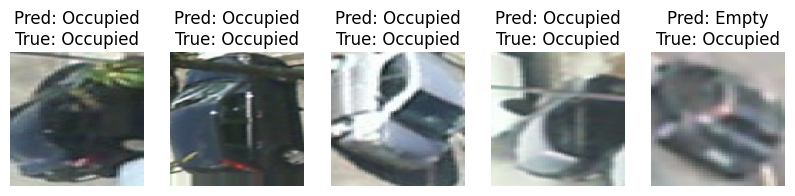

Found 1000 validated image filenames belonging to 2 classes.


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2024-09-11 16:49:28.719068: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 786432000 exceeds 10% of free system memory.
2024-09-11 16:49:29.202985: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 786432000 exceeds 10% of free system memory.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


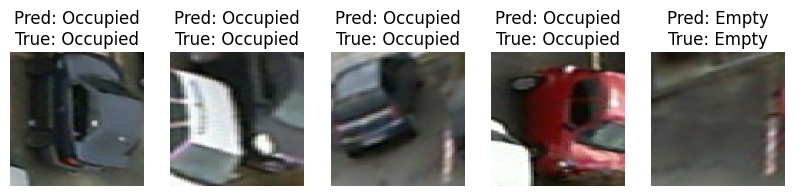

Found 1000 validated image filenames belonging to 2 classes.


/home/lucas/PIBIC (copy)/.venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2024-09-11 16:49:31.761390: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 786432000 exceeds 10% of free system memory.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


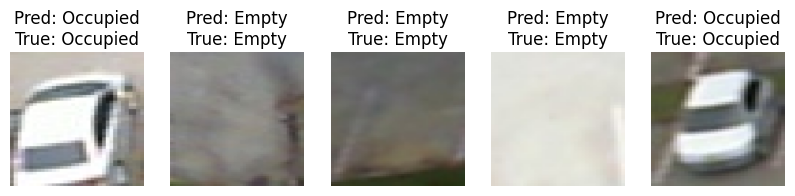

In [19]:
from keras.models import load_model


def predizer_classes(caminho:str):
    classificador = load_model("Modelos_keras/classificador.h5")
    classificador.load_weights('weights_finais/classificador.weights.h5')

    gerador, x_dados, y_dados = preprocessamento_completo(caminho)

    imagem_codificada = encoder.predict(x_dados)
    flatten_imgs = imagem_codificada.reshape((imagem_codificada.shape[0], -1))

    predicao = classificador.predict(flatten_imgs)
    predicao_classes = predicao.argmax(axis=1)
    
    plot_predictions(x_dados[:10], predicao_classes[:10], y_dados[:5], ['Empty', 'Occupied'])

predizer_classes('Datasets_csv/df_UFPR04.csv')
predizer_classes('Datasets_csv/df_UFPR05.csv')
predizer_classes('Datasets_csv/df_PUC.csv')